<a href="https://colab.research.google.com/github/mars241/PYTHON/blob/main/AAM_WCS_KNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

# Executez le code ci-dessous

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
titanic = sns.load_dataset('titanic')
titanic['survived'] = titanic['survived'].apply(lambda x: 'did not survive' if x == 0 else 'survived')

In [35]:
titanic.shape

(891, 15)

In [36]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,did not survive,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,survived,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,survived,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,survived,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,did not survive,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**We are going to learn machine learning concepts with the titanic dataset, one of the most infamous shipwrecks in history.** 

Also as a fun fact, this dataset is one of the most famous datasets around in terms of machine learning next to the MNIST and Iris dataset!

**Nous allons apprendre les concepts de l'apprentissage automatique avec le jeu de données du Titanic, l'un des naufrages les plus tristement célèbres de l'histoire**. 

Pour l'anecdote, ce jeu de données est l'un des plus célèbres jeux de données en termes d'apprentissage automatique, après le MNIST et le jeu de données Iris !

# Data preprocessing
# Pré-traitement des données

Machine learning is nothing without fine data preprocessing and feature engineering.  
Modify the titanic dataset by:

* Selecting dedicated and useful features (i.e columns), only these ones : `survived`, `pclass`, `sex`, `age`, `embark_town`
* Removing rows with NaN data
* Use `factorize` to recode features `sex` (gender) and `embark_town` (the harbour city) into numerical data, because ML needs (and loves) numerical data.

*NB : please really use `factorize`. We'll use `get_dummies`at the end of the quest, to compare it.*


L'apprentissage automatique n'est rien sans un prétraitement fin des données et une ingénierie des caractéristiques.  
Modifiez le jeu de données titanesque en :

* Sélectionnant les caractéristiques (i.e. colonnes) dédiées et utiles, seulement celles-là : `survived`, `pclass`, `sex`, `age`, `embark_town`.
* Suppression des lignes avec des données NaN
* Utiliser `factorize` pour recoder les caractéristiques `sex` (sexe) et `embark_town` (la ville du port) en données numériques, parce que ML a besoin (et aime) les données numériques.

*NB : utilisez vraiment `factorize`. Nous utiliserons `get_dummies` à la fin de la quête, pour le comparer.*

Your should get something like that:

Vous devriez obtenir quelque chose comme ça :

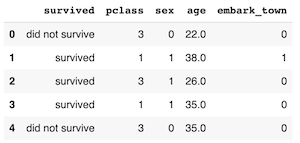

In [37]:
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'embark_town']]
titanic.head()

,survived,pclass,sex,age,embark_town
0,did not survive,3,male,22.0,Southampton
1,survived,1,female,38.0,Cherbourg
2,survived,3,female,26.0,Southampton
3,survived,1,female,35.0,Southampton
4,did not survive,3,male,35.0,Southampton


In [38]:
# Bon usage, enlever les valeurs nulles:
titanic.dropna(inplace = True)

In [39]:
# It's up to you:

# C'est à vous :

# Utiliser factorize pour recoder les caractéristiques sex (sexe) et embark_town (la ville du port) en données numériques, parce que ML a besoin (et aime) les données numériques.
titanic['sex'] = titanic['sex'].factorize()[0] # "sex" est recoder '0' pour 'mâle et '1' pour 'female'
titanic['embark_town'] = titanic['embark_town'].factorize()[0] # "embark_town" est recoder '0' pour 'Southampton' et '1' pour 'Cherbourg'
titanic.head()

,survived,pclass,sex,age,embark_town
0,did not survive,3,0,22.0,0
1,survived,1,1,38.0,1
2,survived,3,1,26.0,0
3,survived,1,1,35.0,0
4,did not survive,3,0,35.0,0


# KNN classification with Scikit-Learn
# KNN classification avec Scikit-Learn


## Train Test Split Data## 
## Train Test Split Data (données)

First you have to divide the titanic dataframe into 2 separated dataframes :
  - `y` with the feature to be predicted (i.e. survived)
  - `X` with the other features that will be used for the model (all numeric features + sex recoded with factorize + embark_town recoded with factorize)

Your `X` should be something like that:


Tout d'abord, vous devez diviser le cadre de données du Titanic en deux cadres de données séparés :
  - `y` avec la caractéristique à prédire (i.e. survécu)
  - `X` avec les autres caractéristiques qui seront utilisées pour le modèle (toutes les caractéristiques numériques + sexe recodé avec factorize + embark_town recodé avec factorize).

Votre `X` devrait être quelque chose comme ça :

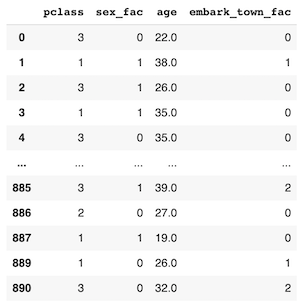


In [40]:
# Your code here

# votre code ici :
titanic = titanic.rename(columns={"sex": "sex_fac", "embark_town": "embark_town_fac"}) # Renomons les speudos variables "dummies" crées
y = titanic['survived'] # y avec la caractéristique à prédire (i.e. survécu)
X = titanic.loc[:, titanic.select_dtypes(exclude=['object']).columns.tolist()] # .tolist(): permet d'améliorer la visu du rendu en liste notemment
#Autrement:
#X = titanic[['pclass', 'sex', 'age', 'embark_town']]
X # X avec les autres caractéristiques qui seront utilisées pour le modèle (toutes les caractéristiques numériques + sexe recodé avec factorize + embark_town recodé avec factorize)

,pclass,sex_fac,age,embark_town_fac
0,3,0,22.0,0
1,1,1,38.0,1
2,3,1,26.0,0
3,1,1,35.0,0
4,3,0,35.0,0
...,...,...,...,...
885,3,1,39.0,2
886,2,0,27.0,0
887,1,1,19.0,0
889,1,0,26.0,1



And then from `X` and `y`, you need to separate them for training and testing your model :
* Use 75% of data for training, the rest for testing
* Please split data with `random_state = 55`

Et ensuite, à partir de `X` et `y`, vous devez les séparer pour l'entraînement et le test de votre modèle :
* Utilisez 75% des données pour l'entraînement, le reste pour les tests.
* Veuillez séparer les données avec `random_state = 55`.

[See the previous quest on train-test split if needed](https://odyssey.wildcodeschool.com/quests/581)

In [42]:
# Your code here
from sklearn.model_selection import train_test_split
#Methode0:
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75) #  Utilisez 75% des données pour l'entraînement(Train)

#Methode1:(Mieux)car répondandant en même temps au 2eme point( séparer les données avec random_state = 55 ):
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 55)

print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 712
The length of the train dataset is   : 534
The length of the test dataset is    : 178


In [ ]:
# Methode3:
# Veuillez séparer les données avec random_state = 55 ; "random_state" est un état aléatoire
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.50, random_state=55)
print(X_train, X_val, y_train, y_val)

# Autrement: avec .split()
#train, validate, test = np.split(titanic(frac=1, random_state=55), [int(.6*len(titanic)), int(.8*len(titanic))]) # Avoir un état aléatoire à cela le rend meilleur le "Train"

     pclass  sex_fac   age  sibsp  parch      fare   class  adult_male deck  \
607       1        0  27.0      0      0   30.5000   First        True  NaN   
413       2        0   NaN      0      0    0.0000  Second        True  NaN   
750       2        1   4.0      1      1   23.0000  Second       False  NaN   
676       3        0  24.5      0      0    8.0500   Third        True  NaN   
503       3        1  37.0      0      0    9.5875   Third       False  NaN   
590       3        0  35.0      0      0    7.1250   Third        True  NaN   
643       3        0   NaN      0      0   56.4958   Third        True  NaN   
96        1        0  71.0      0      0   34.6542   First        True    A   
356       1        1  22.0      0      1   55.0000   First       False    E   
299       1        1  50.0      0      1  247.5208   First       False    B   
209       1        0  40.0      0      0   31.0000   First        True    A   
847       3        0  35.0      0      0    7.8958  

## Model initialization

## Initialisation d'un modèle

CONGRATS !!! You are going to develop your first ML model for KNN classification.  
For that, please create a `model` object that initialises your model with the KNN classifier

FÉLICITATIONS ! !! Vous allez développer votre premier modèle ML pour la classification KNN.  
Pour cela, veuillez créer un objet `model` qui initialisera votre modèle avec le classifieur KNN.

[More info here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [43]:
# Vérifier le types des valeurs du "Train"
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 423 to 583
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pclass           534 non-null    int64  
 1   sex_fac          534 non-null    int64  
 2   age              534 non-null    float64
 3   embark_town_fac  534 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 20.9 KB


#TOPO ML & RAPPEL:

#RadiusNeighborsClassifier
Classificateur basé sur les voisins dans un rayon fixe.

#KNeighborsRegressor
Régression basée sur les k plus proches voisins.

#RadiusNeighborsRegressor
Régression basée sur les voisins dans un rayon fixe.

#NearestNeighbors
Apprentissage non supervisé pour la mise en œuvre de la recherche de voisins.

In [46]:
#Methode0:(mieux)
# Your code here

# Votre code ici 
from sklearn.neighbors import KNeighborsClassifier
model =  KNeighborsClassifier()

In [ ]:
#Methode1:
# Your code here

# Votre code ici 

from sklearn.neighbors import KNeighborsClassifier # Classificateur basé sur les voisins dans un rayon fixe

class KNNModel:
    def __init__(self, n_neighbors=5): # un rayon fixe avec les 5 plus proches voisins
        self.model = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    def fit(self, X, y):
        self.model.fit(X, y)
    
    def predict(self, X):
        return self.model.predict(X)


model = KNNModel()
print(model)
     

## Model fitting

## Modèle d'adaptation/ d'ajustement


# TOPO ML & RAPPEL:

# fit(X, y)

Ajustement du classificateur k-voisins les plus proches à partir de l'ensemble de données d'entraînement.

#get_params([deep])

Récupère les paramètres de cet estimateur.

#kneighbors([X, n_neighbors, return_distance])

Trouver les K-voisins d'un point.

#kneighbors_graph([X, n_neighbors, mode])

Calcule le graphique (pondéré) des k-voisins pour les points dans X.

#predict(X)

Prédit les étiquettes de classe pour les données fournies.

#predict_proba(X)

Retourne les estimations de probabilité pour les données de test X.

#score(X, y[, sample_weight])

Renvoie la précision moyenne sur les données de test et les étiquettes données.

#set_params(**params)

Définit les paramètres de cet estimateur.

Now you have to fit your model on the training data.

Vous devez maintenant ajuster votre modèle sur les données d'entraînement.

[More info here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
# Methode0:
# Your code here

# Votre code ici :
model = model.fit(X_train, X_val)
print(model)
     

In [47]:
# Methode1(mieux):
model.fit(X_train, y_train)
print(model)

KNeighborsClassifier()


## Make predictions

## Faire des prédictions

You model is ready for prediction !

Votre modèle est prêt pour les prédictions !


Make prediction for yourself !  
Change the data below and evaluate your chance of survival ...

Faites vos propres prédictions !  
Modifiez les données ci-dessous et évaluez vos chances de survie ...

In [48]:
# Your code here
# votre code ici
my_class = 3
my_sex = 0
my_age = 28
my_town = 0
my_dfPredict_titanic = np.array([my_class, my_sex, my_age, my_town]).reshape(1,4)
print(model.predict(my_dfPredict_titanic))

['did not survive']


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [49]:
# Then you can execute this code to see probabilities per class
# Puis vous pouvez exécuter ce code pour voir les probabilités par classe
for i, j in zip(model.classes_, model.predict_proba(my_dfPredict_titanic)[0]):
  print("Prediction probability for:", i, "is", j)

Prediction probability for: did not survive is 1.0
Prediction probability for: survived is 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Model evaluation

## Model d'évaluation

Last but not least, you should evaluate the accuracy of your model.  
You can compute the **accuracy score**  directly with the well-known `.score()` method. Remember to compare train score and test score to evaluate overfitting.
Please remember that other metrics are available to evaluate classification models such as precision, recall, f1 score and all together compose the `confusion matrix`.

Enfin, vous devez évaluer la précision de votre modèle.  
Vous pouvez calculer le **score d'exactitude** directement avec la méthode bien connue `.score()`. N'oubliez pas de comparer le score de train et le score de test pour évaluer l'overfitting.
N'oubliez pas que d'autres métriques sont disponibles pour évaluer les modèles de classification tels que la précision, le rappel, le score f1 et tous ensemble composent la `matrice de confusion`.

In [50]:
# Your code here to compare test and train score (accuracy score). Is there overfitting?
# Votre code ici pour comparer le score de test et de formation (score de précision). Y a-t-il un surajustement ?
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

# Oui il y a un sur/(ou plutôt un sous) ajustement!

0.8314606741573034
0.7808988764044944


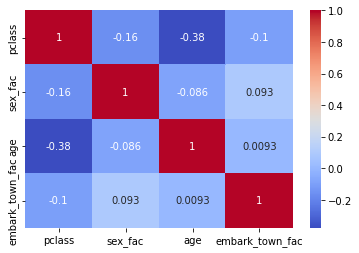

In [51]:
#Suite:
# Your code here to compare test and train score (accuracy score). Is there overfitting?

# Votre code ici pour comparer le score de test et de formation (score de précision). Y a-t-il un surajustement ?

import seaborn as sns
import matplotlib.pyplot as plt

corr = X_train.corr() # Recherche de corélation dans le "Train" de manière visuel
sns.heatmap(corr, annot=True, cmap='coolwarm') # représentation Matrice de confusion 
plt.show()


In [55]:
# You can execute this code to get the confusion matrix

# Vous pouvez exécuter ce code pour obtenir la matrice de confusion

from sklearn.metrics import confusion_matrix
pd.DataFrame (data = confusion_matrix(y_true = y_test, y_pred = model.predict(X_test)),
             index = model.classes_ + " ACTUAL",
             columns = model.classes_ + " PREDICTED")

,did not survive PREDICTED,survived PREDICTED
did not survive ACTUAL,97,19
survived ACTUAL,20,42


**How many false positives are there?  In other words, how many people were predicted to die when in fact they survived?**

**Combien de faux positifs y a-t-il ?  En d'autres termes, combien de personnes étaient censées mourir alors qu'elles ont en fait survécu ?**

Performances of our model are pretty poor and could be explained by the original dataset.  
Anoher way is to tune the hyperparameter such as the number of neighbors ...

l'ensemble de données d'origine.  
Une autre façon est d'ajuster l'hyperparamètre tel que le nombre de voisins ...

## Hyperparameter - improve you model

## Hyperparamètre - améliorer le modèle

Let's play with the `n_neighbors` and `weights` hyperparameters of the model.  
* Evaluate the accuracy score (only on the test set) of your models by adjusting the hyperparameter `n_neighbors`  from 2 to 10, and changing `weights` between `uniform` and `distance`.
* What is the values of `n_neighbors` and `weights` that leads to the best score ?

*NB: you could use a loop to test the different hyperparameter values*

*Tip: you should find as optimal value `n_neighbors = 2` and `weights = 'distance'`, with a test score value of `0.809`.*



Jouons avec les hyperparamètres `n_neighbors` et `weights` du modèle.  
* Evaluez le score de précision (uniquement sur l'ensemble de test) de vos modèles en ajustant l'hyperparamètre `n_neighbors` de 2 à 10, et en changeant les `weights` entre `uniform` et `distance`.
* Quelles sont les valeurs de `n_neighbors` et `weights` qui mènent au meilleur score ?

*NB : vous pouvez utiliser une boucle pour tester les différentes valeurs des hyperparamètres*.

*Astuce : vous devriez trouver comme valeur optimale `n_neighbors = 2` et `weights = 'distance'`, avec une valeur de score de test de `0.809`.*

In [63]:
# Your code here

# votre code ici:

for neighbors in range(2,11):
  for weight in ["uniform" , "distance"]:
    model =  KNeighborsClassifier(n_neighbors = neighbors , weights = weight).fit(X_train, y_train)
    print("Pour ", neighbors, "'voisins'/'neighbors' et de 'distance'/'weight'=", weight, 
          "; le 'train' score est:", model.score(X_train, y_train), 
          "et le 'test' score:", model.score(X_test, y_test))


Pour  2 'voisins'/'neighbors' et de 'distance'/'weight'= uniform ; le 'train' score est: 0.8314606741573034 et le 'test' score: 0.7808988764044944
Pour  2 'voisins'/'neighbors' et de 'distance'/'weight'= distance ; le 'train' score est: 0.8951310861423221 et le 'test' score: 0.8089887640449438
Pour  3 'voisins'/'neighbors' et de 'distance'/'weight'= uniform ; le 'train' score est: 0.8707865168539326 et le 'test' score: 0.7921348314606742
Pour  3 'voisins'/'neighbors' et de 'distance'/'weight'= distance ; le 'train' score est: 0.9119850187265918 et le 'test' score: 0.797752808988764
Pour  4 'voisins'/'neighbors' et de 'distance'/'weight'= uniform ; le 'train' score est: 0.8239700374531835 et le 'test' score: 0.7640449438202247
Pour  4 'voisins'/'neighbors' et de 'distance'/'weight'= distance ; le 'train' score est: 0.9119850187265918 et le 'test' score: 0.8033707865168539
Pour  5 'voisins'/'neighbors' et de 'distance'/'weight'= uniform ; le 'train' score est: 0.8314606741573034 et le 't

In [58]:
# Testons l'échantillon d'entraînement "Train" pour "n_neighbors = 2 & weights = 'distance'"
model =  KNeighborsClassifier(n_neighbors = 2 , weights = 'distance').fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8951310861423221
0.8089887640449438


# Let's go back to data processing to improve our model


In [60]:
# Let's re-import data in a new dataset to compare, just execute the code below:
# Réimportons les données dans un nouveau jeu de données pour les comparer, il suffit d'exécuter le code ci-dessous :
titanic2 = sns.load_dataset('titanic')
titanic2['survived'] = titanic2['survived'].apply(lambda x: 'did not survive' if x == 0 else 'survived')
titanic2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,did not survive,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,survived,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,survived,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,survived,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,did not survive,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



Please do the same data processing as previously, but change `embark_town` (the harbour city) with get_dummies (and not factorize).
Then initialize, fit and score your model. Is it better? 

Veuillez faire le même traitement de données que précédemment, mais changez `embark_town` (la ville portuaire) avec get_dummies (et non factorize).
Ensuite, initialisez, ajustez et évaluez votre modèle. Est-il meilleur ?

You should have a `X` like this one:

Vous devriez avoir un "X" comme celui-ci :

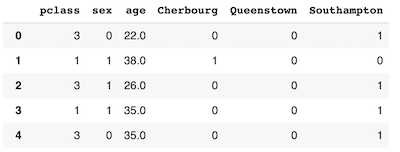

In [61]:
# It's up to you:

# C'est à vous:

titanic2 = titanic2[['survived', 'pclass', 'sex', 'age', 'embark_town']]
titanic2.dropna(inplace = True)
titanic2["sex"] = titanic2["sex"].factorize()[0]

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
<ipython-input-61-4e639c54ac54>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic2["sex"] = titanic2["sex"].factorize()[0]


In [62]:
X

,pclass,sex_fac,age,embark_town_fac
0,3,0,22.0,0
1,1,1,38.0,1
2,3,1,26.0,0
3,1,1,35.0,0
4,3,0,35.0,0
...,...,...,...,...
885,3,1,39.0,2
886,2,0,27.0,0
887,1,1,19.0,0
889,1,0,26.0,1


# Conclusions
* Congrats !!! You just landed on the MACHINE LEARNING CLASSIFICATION planet
* The KNN classifier is an algorithm from supervised learning part of ML
* Scikit learn is the to-know-and-to-love toolbox for ML
* Our KNN classifier could be improved with hyperparameter tuning. 
* There is no perfect algorithm, we can very often improve a score by **feature engineering**, rather than looking for another algorithm
* Other algorithms should be tested for selecting the best one, but it is another story ... to be continued ML Data Wilders :) 

# Conclusions
* Félicitations ! !! Vous venez d'atterrir sur la planète CLASSIFICATION PAR APPRENTISSAGE MACHINÉ
* Le classifieur KNN est un algorithme de la partie apprentissage supervisé du ML.
* Scikit learn est la boîte à outils la plus connue et la plus appréciée pour le ML.
* Notre classificateur KNN pourrait être amélioré en ajustant les hyperparamètres. 
* Il n'existe pas d'algorithme parfait, nous pouvons très souvent améliorer un score par **ingénierie des caractéristiques**, plutôt que de chercher un autre algorithme.
* D'autres algorithmes devraient être testés pour sélectionner le meilleur, mais c'est une autre histoire ... à suivre ML Data Wilders :)